In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

data = pd.read_csv('/content/heart.csv')
print(data.head())

   age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  slope  \
0   52    1   0       125   212    0        1      168      0      1.0      2   
1   53    1   0       140   203    1        0      155      1      3.1      0   
2   70    1   0       145   174    0        1      125      1      2.6      0   
3   61    1   0       148   203    0        1      161      0      0.0      2   
4   62    0   0       138   294    1        1      106      0      1.9      1   

   ca  thal  target  
0   2     3       0  
1   0     3       0  
2   0     3       0  
3   1     3       0  
4   3     2       0  


In [2]:
y=data['target']

x=data[['age','sex','cp','trestbps','chol','fbs','restecg','thalach','exang','oldpeak','slope','ca','thal']]
print(x)

      age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  \
0      52    1   0       125   212    0        1      168      0      1.0   
1      53    1   0       140   203    1        0      155      1      3.1   
2      70    1   0       145   174    0        1      125      1      2.6   
3      61    1   0       148   203    0        1      161      0      0.0   
4      62    0   0       138   294    1        1      106      0      1.9   
...   ...  ...  ..       ...   ...  ...      ...      ...    ...      ...   
1020   59    1   1       140   221    0        1      164      1      0.0   
1021   60    1   0       125   258    0        0      141      1      2.8   
1022   47    1   0       110   275    0        0      118      1      1.0   
1023   50    0   0       110   254    0        0      159      0      0.0   
1024   54    1   0       120   188    0        1      113      0      1.4   

      slope  ca  thal  
0         2   2     3  
1         0   0     3  
2  

/tmp/ipython-input-1860135014.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='target', data=data, palette='coolwarm')


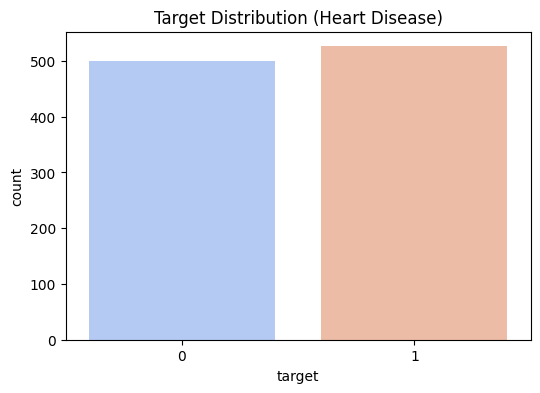

In [3]:
# 1. Target distribution
plt.figure(figsize=(6,4))
sns.countplot(x='target', data=data, palette='coolwarm')
plt.title("Target Distribution (Heart Disease)")
plt.show()

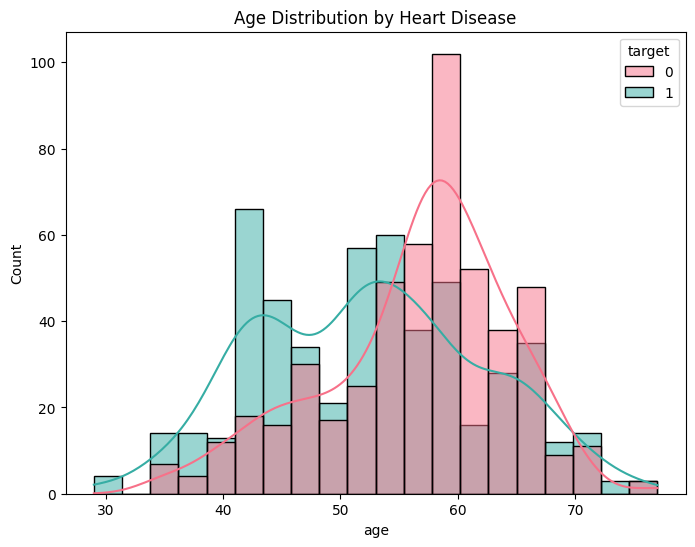

In [4]:
# 2. Age distribution vs Target
plt.figure(figsize=(8,6))
sns.histplot(data=data, x='age', hue='target', kde=True, palette='husl', bins=20)
plt.title("Age Distribution by Heart Disease")
plt.show()

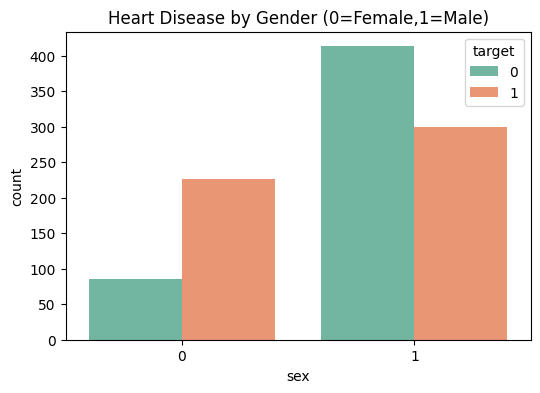

In [5]:
# 3. Sex vs Target
plt.figure(figsize=(6,4))
sns.countplot(x='sex', hue='target', data=data, palette='Set2')
plt.title("Heart Disease by Gender (0=Female,1=Male)")
plt.show()

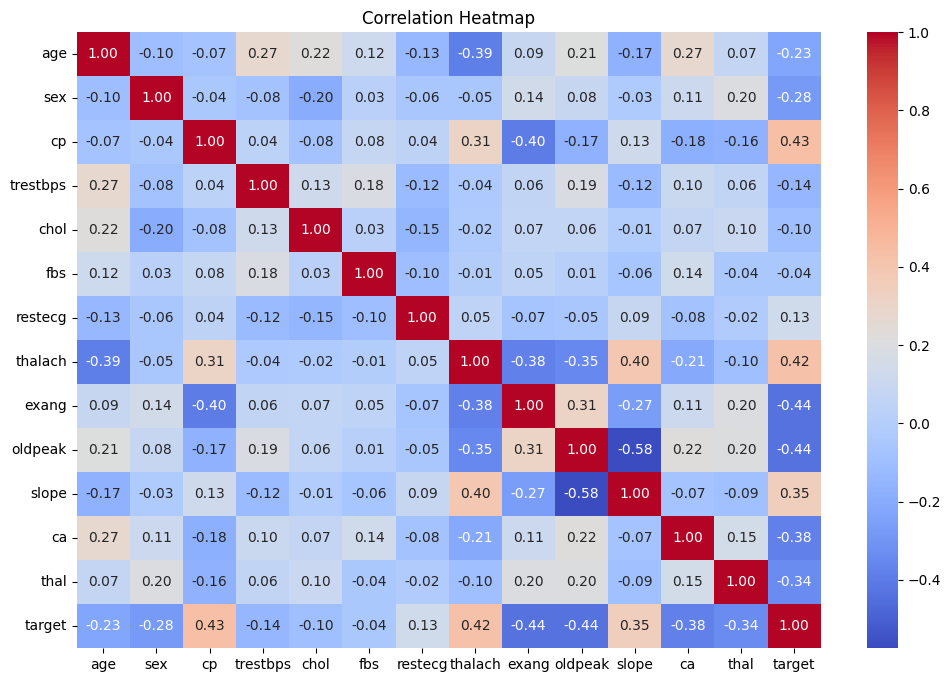

In [6]:
# 4. Correlation heatmap
plt.figure(figsize=(12,8))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()

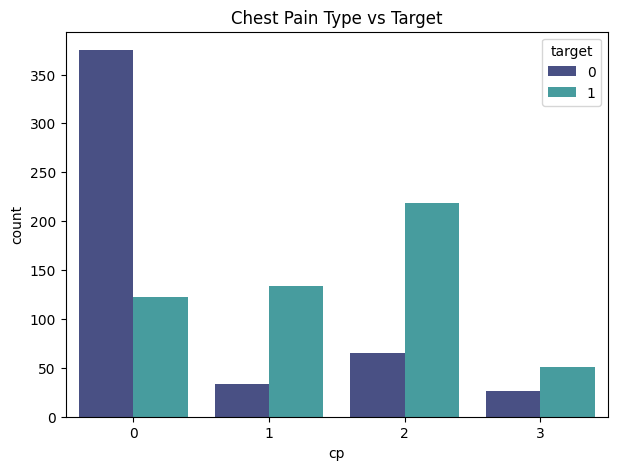

In [7]:
# 5. Chest Pain Type vs Target
plt.figure(figsize=(7,5))
sns.countplot(x='cp', hue='target', data=data, palette='mako')
plt.title("Chest Pain Type vs Target")
plt.show()

/tmp/ipython-input-2594550147.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='target', y='thalach', data=data, palette='muted', split=True)


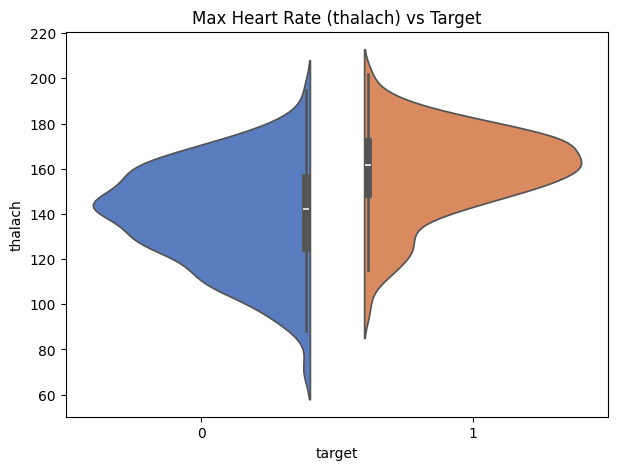

In [8]:
# 6. Max Heart Rate vs Target
plt.figure(figsize=(7,5))
sns.violinplot(x='target', y='thalach', data=data, palette='muted', split=True)
plt.title("Max Heart Rate (thalach) vs Target")
plt.show()

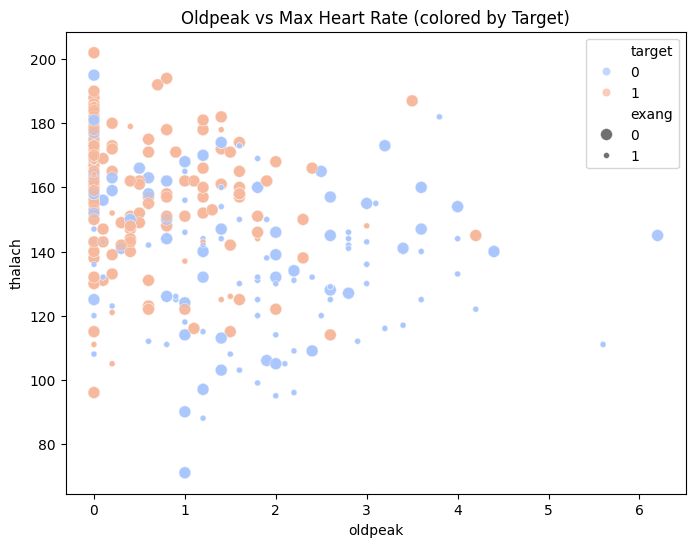

In [9]:
# 7. Oldpeak vs Thalach scatter
plt.figure(figsize=(8,6))
sns.scatterplot(x='oldpeak', y='thalach', hue='target', size='exang',
                data=data, palette='coolwarm', alpha=0.7)
plt.title("Oldpeak vs Max Heart Rate (colored by Target)")
plt.show()

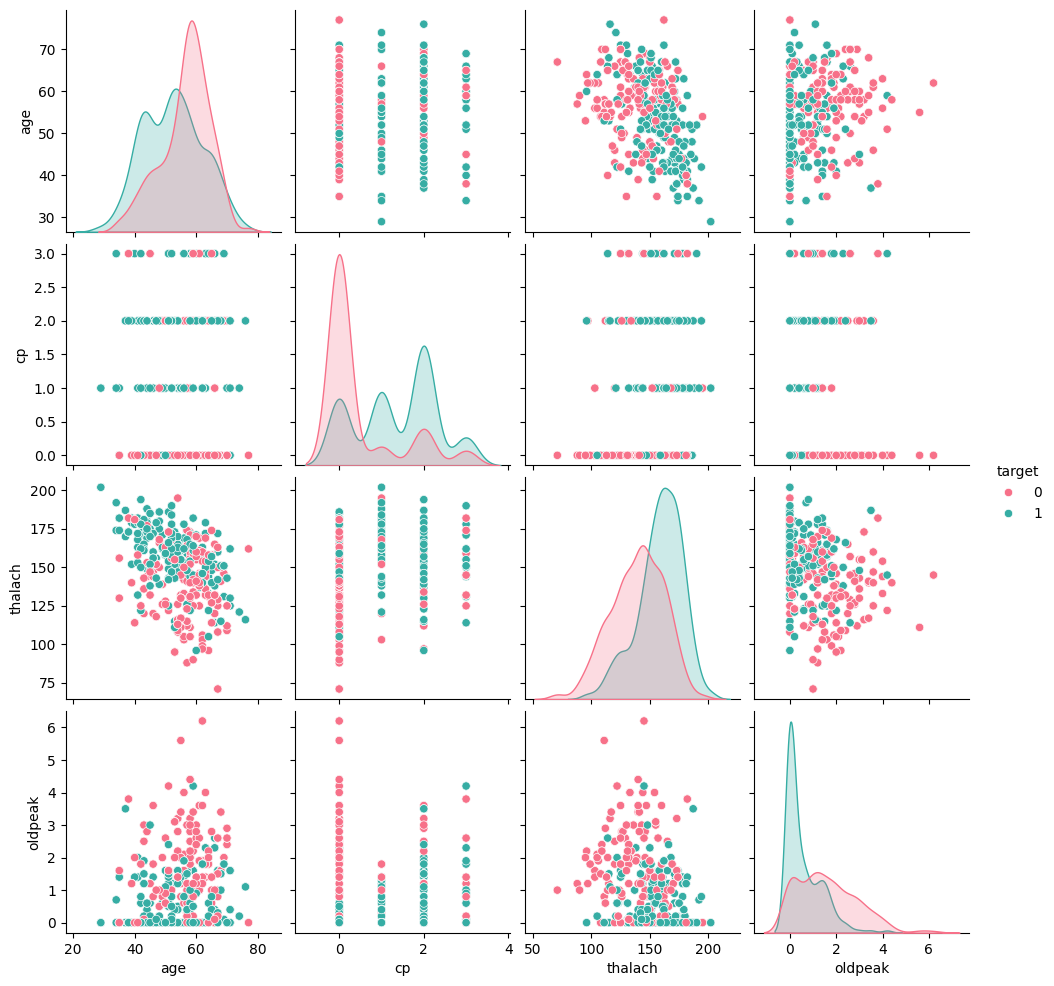

In [10]:
# 8. Pairplot
sns.pairplot(data[['age','cp','thalach','oldpeak','target']], hue='target', palette='husl')
plt.show()

In [11]:
from sklearn.model_selection import train_test_split as skms
(x_train,x_test,y_train,y_test) = skms(x, y, test_size=0.25, random_state=42)
print(len(x_train))
print(len(x_test))
print(len(y_train))
print(len(y_test))

768
257
768
257


In [12]:
from sklearn.metrics import classification_report
from sklearn.ensemble import RandomForestClassifier
RF = RandomForestClassifier(n_estimators=50)
res=RF.fit(x_train,y_train)
y_pred=res.predict(x_test)
print(classification_report(y_test,y_pred))


              precision    recall  f1-score   support

           0       0.98      1.00      0.99       132
           1       1.00      0.98      0.99       125

    accuracy                           0.99       257
   macro avg       0.99      0.99      0.99       257
weighted avg       0.99      0.99      0.99       257



In [13]:
import numpy as np
import warnings
warnings.filterwarnings("ignore")

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report

# Only valid combinations of solver + penalty
param_grid = [
    {'solver': ['liblinear'], 'penalty': ['l1', 'l2'], 'C': [0.01, 0.1, 1, 10]},
    {'solver': ['saga'], 'penalty': ['l1', 'l2', 'elasticnet'],
     'l1_ratio': [0, 0.5, 1], 'C': [0.01, 0.1, 1, 10]}
]

log_reg = LogisticRegression(max_iter=5000)

grid_lr = GridSearchCV(log_reg, param_grid, cv=5, scoring='recall', n_jobs=-1)
grid_lr.fit(x_train, y_train)

y_pred_lr = grid_lr.predict(x_test)

print("Best Parameters for Logistic Regression:", grid_lr.best_params_)
print(classification_report(y_test, y_pred_lr))


Best Parameters for Logistic Regression: {'C': 1, 'penalty': 'l1', 'solver': 'liblinear'}
              precision    recall  f1-score   support

           0       0.85      0.73      0.79       132
           1       0.76      0.86      0.81       125

    accuracy                           0.80       257
   macro avg       0.80      0.80      0.80       257
weighted avg       0.80      0.80      0.80       257



In [14]:
from xgboost import XGBClassifier

# Define parameter grid
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.1, 0.2],
    'subsample': [0.8, 1.0],
    'colsample_bytree': [0.8, 1.0]
}

xgb = XGBClassifier(eval_metric='logloss', use_label_encoder=False)

grid_xgb = GridSearchCV(xgb, param_grid, cv=5, scoring='recall')
grid_xgb.fit(x_train, y_train)

y_pred_xgb = grid_xgb.predict(x_test)

print("Best Parameters for XGBoost:", grid_xgb.best_params_)
print(classification_report(y_test, y_pred_xgb))


Best Parameters for XGBoost: {'colsample_bytree': 1.0, 'learning_rate': 0.1, 'max_depth': 7, 'n_estimators': 50, 'subsample': 1.0}
              precision    recall  f1-score   support

           0       0.98      1.00      0.99       132
           1       1.00      0.98      0.99       125

    accuracy                           0.99       257
   macro avg       0.99      0.99      0.99       257
weighted avg       0.99      0.99      0.99       257



In [16]:
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report

pipe_svc = Pipeline([
    ('scaler', StandardScaler()),
    ('svc', SVC())
])

param_grid = {
    'svc__C': [0.1, 1, 10],
    'svc__kernel': ['linear', 'rbf'],
    'svc__gamma': ['scale']  # reduced to speed up
}

grid_svc = GridSearchCV(pipe_svc, param_grid, cv=3, scoring='recall', n_jobs=-1)
grid_svc.fit(x_train, y_train)

y_pred_svc = grid_svc.predict(x_test)

print("Best Parameters for SVM:", grid_svc.best_params_)
print(classification_report(y_test, y_pred_svc))


Best Parameters for SVM: {'svc__C': 10, 'svc__gamma': 'scale', 'svc__kernel': 'rbf'}
              precision    recall  f1-score   support

           0       0.96      0.98      0.97       132
           1       0.98      0.95      0.97       125

    accuracy                           0.97       257
   macro avg       0.97      0.97      0.97       257
weighted avg       0.97      0.97      0.97       257

